In [ ]:
# import os,shutil
# shutil.rmtree("CS221-Project")

# 1. Import thư viện cần thiết


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import math
import ast
import re
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

#2. Load dữ liệu đã thu thập


In [ ]:
# import os,shutil
# shutil.rmtree("underthesea")

In [ ]:
!git clone https://github.com/undertheseanlp/underthesea

fatal: destination path 'underthesea' already exists and is not an empty directory.


In [ ]:
words = open('/content/underthesea/underthesea/corpus/data/Viet74K.txt', encoding='utf-8').readlines()


In [ ]:
print(len(words))

73901


In [ ]:
# words

In [ ]:
new_words = []
for word in words: 
    new_words.append(word.replace("-"," "))
# new_words

In [ ]:
bi_grams = []
tri_grams = []
for word in new_words: 
  count_space =0
  for chart in word:
    if chart ==" ":
      count_space+=1
  if count_space == 2:
    tri_grams.append(word.replace("\n",""))
    new_words.remove(word)
  if count_space == 1:
    bi_grams.append(word.replace("\n",""))
    new_words.remove(word)


In [ ]:
len(bi_grams)

27938

In [ ]:
len(tri_grams)

3402

In [ ]:
!git clone https://github.com/HgThinker/CS221-Project.git

Cloning into 'CS221-Project'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 265 (delta 51), reused 0 (delta 0), pack-reused 136
Receiving objects: 100% (265/265), 421.95 KiB | 4.85 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [ ]:
sentences = open('CS221-Project/dataset/sentences.txt', encoding='utf-8').readlines()
tokenize_sentences = [sentence.split(' ') for sentence in sentences]

In [ ]:
print('Số lượng câu đã thu thập:', len(sentences))
sentences[0:2]

Số lượng câu đã thu thập: 60


['Để đủ điều kiện ra trường thì em cần đạt bằng Toeic ở mức bao nhiêu điểm ạ ? \n',
 'Nếu có bằng Toeic 2 kỹ năng 450 + rồi thì không cần học Anh văn 3 đúng không ạ ?\n']

In [ ]:
max_str = max(tokenize_sentences, key=len)
print('Câu có số từ nhiều nhât:', len(max_str))
' '.join(max_str)

Câu có số từ nhiều nhât: 66


'Mình có cài phần mềm Invision Studio nhưng khi mình chạy file setup xong thì không thấy response gì nữa và quá trình cài cũng không thấy đâu, mình chạy lại file setup đến 4 - 5 lần nhưng vẫn vô vọng , tìm mọi cách nhưng không fix được , không biết việc này có liên quan đến lỗi win hay không ạ ? \n'

In [ ]:
min_str = min(tokenize_sentences, key=len)
print('Câu có số từ ít nhât:', len(min_str))
' '.join(min_str)

Câu có số từ ít nhât: 11


'Em phải làm gì khi không đạt điểm học phần ?\n'

#3. Tách từ


## 3.1 Sử dụng thuật toán Longest-Matching

In [ ]:
def syllablize(sentence):
    word = '\w+'
    non_word = '[^\w\s]'
    digits = '\d+([\.,_]\d+)+'
    
    patterns = []
    patterns.extend([word, non_word, digits])
    patterns = f"({'|'.join(patterns)})"
    
    sentence = ud.normalize('NFC', sentence)
    tokens = re.findall(patterns, sentence, re.UNICODE)
    return [token[0] for token in tokens]

In [ ]:
def load_n_grams(path):
    with open(path, encoding='utf8') as f:
        words = f.read()
        words = ast.literal_eval(words)
    return words

In [ ]:
def longest_matching(sentence, bi_grams, tri_grams):
    syllables = syllablize(sentence)
    syl_len = len(syllables)
    
    curr_id = 0
    word_list = []
    done = False
    
    while (curr_id < syl_len) and (not done):
        curr_word = syllables[curr_id]
        if curr_id >= syl_len - 1:
            word_list.append(curr_word)
            done = True
        else:
            next_word = syllables[curr_id + 1]
            pair_word = ' '.join([curr_word.lower(), next_word.lower()])
            if curr_id >= (syl_len - 2):
                if pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
            else:
                next_next_word = syllables[curr_id + 2]
                triple_word = ' '.join([pair_word, next_next_word.lower()])
                if triple_word in tri_grams:
                    word_list.append('_'.join([curr_word, next_word, next_next_word]))
                    curr_id += 3
                elif pair_word in bi_grams:
                    word_list.append('_'.join([curr_word, next_word]))
                    curr_id += 2
                else:
                    word_list.append(curr_word)
                    curr_id += 1
    return word_list

In [ ]:
longest_matching('Hôm nay là một ngày đẹp trời , em đi siêu thị trên đường Võ Thị Sáu .', bi_grams, tri_grams)


['Hôm_nay',
 'là',
 'một',
 'ngày',
 'đẹp_trời',
 ',',
 'em',
 'đi',
 'siêu_thị',
 'trên',
 'đường',
 'Võ',
 'Thị',
 'Sáu',
 '.']

In [ ]:
with open('CS221-Project/tokenize/longest_matching_tokens.txt', 'w', encoding='utf-8') as f:
    longest_matching_sentences = []
    for sentence in sentences:
        word_list = longest_matching(sentence, bi_grams, tri_grams)
        longest_matching_sentences.append(' '.join(word_list))
        for word in word_list: f.write(word + '\n')
        if sentence != sentences[-1]: f.write('\n')
    f.write('\n')
longest_matching_sentences[3:10]

['Mình sẽ cùng các bạn phát_triển các Mini Platform có thể bao_quát hết toàn_bộ các môn học của bạn tại trường để làm nền tảng kiến thức thực_tế giúp cho các bạn ra trường không_phải đào_tạo lại hoàn_toàn ở công ty mới .',
 'Trong 5 năm làm việc tại TK25 , mình cũng đã tham gia đào_tạo nhiều bạn trẻ từ_ngày mới ra trường cho tới khi đã trở_thành Senior .',
 'Hiện_tại mình cũng đang Mentor cho 5 bạn tại công ty .',
 'SV UIT được tham gia lớp học miễn_phí thay_vì đóng 800 . 000 đ / khóa , tuy_nhiên các bạn phải có trách nhiệm hoàn thành lớp học đúng_hạn .',
 'Mình có sưu_tầm một_số đề thi các môn cơ sở ngành của các trường KHTN , BKHCM , BKHN , ĐH Công_Nghệ muốn chia sẻ với các bạn để có thêm tài_liệu rèn luyện , ôn thi .',
 'Bất kỳ xử phạt nào cũng có_lý do và đều được thông báo riêng với account vi_phạm hoặc thông_qua bảng phong_thần - trừ việc xóa bài là lý do bị ẩn đi .',
 'BHTCNPM với các bài training luôn_luôn đặt chất lượng và kiến thức của sinh_viên lên hàng đầu , đồng thời với n

In [ ]:
count_longest_matching_compounds = 0
for sentence in longest_matching_sentences:
    for word in sentence.split():
        if '_' in word: count_longest_matching_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching:', count_longest_matching_compounds)

Số lượng từ ghép khi tách từ bằng thuật toán Longest Matching: 187


##3.2 Sử dụng thư viện VnCoreNLP

In [ ]:
!pip install py-vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import py_vncorenlp
py_vncorenlp.download_model(save_dir='./')
# model = py_vncorenlp.VnCoreNLP(annotators=["wseg", "pos", "ner", "parse"], save_dir='./')

The VnCoreNLP model is already!


In [ ]:
def vncore_tokenize(sentence):
  vncore_sentences = model.annotate_text(sentence)
  sent = vncore_sentences[0]
  word_list = []
  for word in sent:
    word_list.append(word["wordForm"])
  return word_list

In [ ]:
with open('CS221-Project/tokenize/vncore_tokens.txt', 'w', encoding='utf-8') as f:
  vncore_sentences = []
  for sentence in sentences:
      word_list = vncore_tokenize(sentence)
      vncore_sentences.append(' '.join(word_list))
      for word in word_list: 
        f.write(word + '\n')
      if sentence != sentences[-1]: f.write('\n')
  f.write('\n')
vncore_sentences[30:35]

['Em học năm nhất thì HK2 có nên đăng_ký các môn chính_trị không ạ , hay_là cứ như kế_hoạch học_tập trong sổ_tay sinh_viên ạ ?',
 'Cho em hỏi còn môn lập_trình hướng đối_tượng có nên đăng_ký không , vì em còn code yếu ?',
 'Cho em hỏi là học thể_dục thì em có_thể mua áo UIT màu trắng ở đâu ạ ?',
 'Nếu không còn bán thì em có_thể mặc áo màu cam của chương_trình OEP được không ạ ?',
 'Wifi của trường UIT public và UIT có tốc_độ cực_kì chậm tại Thư_viện , ngoài_ra thì hệ_thống cáp wifi cắm vào laptop ở các dãy bàn của thư_viện cũng không hoạt_động .']

In [ ]:
count_vncore_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 342


## Sử dụng thư viện Underthesea


In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from underthesea import word_tokenize 

In [ ]:
with open('CS221-Project/tokenize/underthesea_tokens.txt', 'w', encoding='utf-8') as f:
  underthesea_sentences = []
  for sentence in sentences:
      word_list = word_tokenize(str(sentence).strip(),format="text")
      word_list = word_list.split(" ")
      underthesea_sentences.append(' '.join(word_list))
      for word in word_list: 
        f.write(word + '\n') 
      if sentence != sentences[-1]: f.write('\n')
  f.write('\n')
underthesea_sentences[30:35]

['Em học năm nhất thì HK2 có nên đăng_ký các môn chính_trị không ạ , hay_là cứ như kế_hoạch học_tập trong sổ_tay sinh_viên ạ ?',
 'Cho em hỏi còn môn lập_trình hướng đối_tượng có nên đăng_ký không , vì em còn code yếu ?',
 'Cho em hỏi là học thể_dục thì em có_thể mua áo UIT màu trắng ở đâu ạ ?',
 'Nếu không còn bán thì em có_thể mặc áo màu cam của chương_trình OEP được không ạ ?',
 'Wifi của trường UIT_public và UIT có tốc_độ cực_kì chậm tại Thư_viện , ngoài_ra thì hệ_thống cáp wifi cắm vào laptop ở các dãy bàn của thư_viện cũng không hoạt_động .']

In [ ]:
count_underthesea_tokenize_compounds = 0
for sentence in underthesea_sentences:
    for word in sentence:
        if '_' in word: count_underthesea_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện underthesea:', count_underthesea_tokenize_compounds)

Số lượng từ ghép khi tách từ bằng thư viện underthesea: 357


##3.3 Tách từ bán thủ công

In [ ]:
with open('CS221-Project/tokenize/manual_tokens.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else: sentence += word.replace('\n', ' ')
manual_tokenize_sentences[30:35]

['Em  học  năm  nhất thì  HK2 có  nên  đăng_ký  các  môn  chính_trị không  ạ  , hay_là cứ như  kế_hoạch học_tập  trong  sổ_tay sinh_viên  ạ ?',
 'Cho  em  hỏi  còn  môn  lập_trình hướng đối_tượng có  nên  đăng_ký  không , vì  em  còn  code yếu ?',
 'Cho  em  hỏi  là  học  thể_dục thì  em  có_thể  mua áo UIT  màu trắng ở  đâu  ạ ?',
 'Nếu  không còn bán thì  em  có_thể  mặc áo màu cam của  chương_trình OEP được  không  ạ ?',
 'Wifi  của  trường  UIT_public và  UIT có  tốc_độ cực_kì chậm tại  Thư_viện , ngoài_ra thì  hệ_thống  cáp wifi  cắm vào  laptop ở  các  dãy bàn của  thư_viện cũng  không  hoạt_động .']

In [ ]:
count_manual_tokenize_compounds = 0
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: count_manual_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 339


## 3.4 Đánh giá kết quả tách từ

In [ ]:
def count_correct_words(pred, source, n_grams=3):
    pred_words = pred.split()
    source_words = source.split()
    
    total_true, tp = 0, 0
    total_errors, fp = 0, 0
    
    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]: 
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1
    
    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]: 
            del source_words[idx]
        else: idx += 1
    
    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words
    
    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1 
            total_true += 1
                    
    return total_true, total_errors, tp, fp

In [ ]:
def tokenize_evaluation(pred, source, n_grams=3):
    total_true = 0
    total_errors = 0
    total_words = 0
    
    pred_tp = 0
    pred_fp = 0
    
    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true 
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words, 
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp, 
        'False Positive': pred_fp,
        'Total True': total_true, 
        'Total Errors': total_errors
    }

In [ ]:
longest_matching_evaluation = tokenize_evaluation(longest_matching_sentences, manual_tokenize_sentences)
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)
underthesea_evaluation = tokenize_evaluation(underthesea_sentences, manual_tokenize_sentences)
pd.DataFrame(
    [longest_matching_evaluation, vncore_evaluation, underthesea_evaluation], 
    index = ['Longest Matching', 'VnCoreNLP','Underthesea']
).astype(object).T

,Longest Matching,VnCoreNLP,Underthesea
Accuracy,0.491239,0.902115,0.883384
Precision,0.453552,0.904478,0.876081
Recall,0.244838,0.893805,0.896755
True Positive,83,303,304
False Positive,100,32,43
Total True,813,1493,1462
Total Errors,1005,136,156


# 4. Tạo ngữ liệu

In [ ]:
longest_matching_tokens = open('CS221-Project/tokenize/longest_matching_tokens.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(longest_matching_tokens))
longest_matching_tokens[0:5]

Số lượng từ: 1905


['Để\n', 'đủ\n', 'điều_kiện\n', 'ra\n', 'trường\n']

In [ ]:
vncore_tokens = open('CS221-Project/tokenize/vncore_tokens.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(vncore_tokens))
vncore_tokens[0:5]

Số lượng từ: 1717


['Để\n', 'đủ\n', 'điều_kiện\n', 'ra\n', 'trường\n']

In [ ]:
manual_tokens = open('CS221-Project/tokenize/manual_tokens.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(manual_tokens))
manual_tokens[0:5]

Số lượng từ: 1715


['Để\n', 'đủ\n', 'điều_kiện\n', 'ra\n', 'trường\n']

In [ ]:
underthesea_tokens = open('CS221-Project/tokenize/underthesea_tokens.txt', encoding='utf-8').readlines()
print('Số lượng từ:', len(underthesea_tokens))
underthesea_tokens[0:5]

Số lượng từ: 1709


['Để\n', 'đủ\n', 'điều_kiện\n', 'ra\n', 'trường\n']

## 4.1 Tạo ngữ liệu bán thủ công: Gán nhãn trước bằng VncoreNLP sau đó kiểm tra lại nhãn

In [ ]:
def vncore_postag(word_input):
  vncore_word = model.annotate_text(word_input)
  sent = vncore_word[0]
  for word in sent:
    tag = word["posTag"]
  return tag

In [ ]:
# with open('CS221-Project/dataset/vncore.txt', 'w', encoding='utf-8') as f:
#   for word in manual_tokens:
#     word = word.replace('\n', '')
#     if word == '':
#       tag = []
#     elif '_' not in word: tag = vncore_postag(word)
#     else: tag = vncore_postag(word.replace('_', ' '))
        
#     if tag == []: f.write('\n')
#     else: f.write(f'{word}\t{tag}\n')
#   f.write('\n')

In [ ]:
#Mảng new_line_idx lưu độ dài mỗi câu, kết thúc câu bằng ký tự '\n'
gold_corpus = open('/content/CS221-Project/dataset/gold.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(manual_tokens) if item == '\n']
print(len(new_line_idx))

60


In [ ]:
index = 50
with open('CS221-Project/dataset/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[index]]: f.write(line)
    
with open('CS221-Project/dataset/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[index] + 1:]: f.write(line)

In [ ]:
with open('CS221-Project/dataset/train_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[index]]: f.write(re.sub('\t.*', '', line))
    # f.write('\n')        
    
with open('CS221-Project/dataset/test_words.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[index] + 1:]: f.write(re.sub('\t.*', '', line))

# 5. Đọc dữ liệu

In [ ]:
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()
    
    for index, word in enumerate(file):
        if not word.split():
            word = '--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word = '--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [ ]:
def plot_tag_counts(gold):
    # for word_tag in gold:
    #    if word_tag.split():
    #      print(word_tag.split()[0]," ",word_tag.split()[1])
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()] # Lấy nhãn của từng từ tạo thành một danh sách các nhãn
    tag_counts = pd.DataFrame(tags)[0].value_counts() # Đếm tần số xuất hiện của từng nhãn
    print(tag_counts) 
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

N     453
V     396
R     141
CH    132
C     105
E      92
X      73
A      71
P      49
D      49
M      26
I      24
Cc     23
Np     10
Ni      5
Z       2
Nu      1
Nc      1
O       1
Name: 0, dtype: int64


,N,V,R,CH,C,E,X,A,P,D,M,I,Cc,Np,Ni,Z,Nu,Nc,O,Total
0,453,396,141,132,105,92,73,71,49,49,26,24,23,10,5,2,1,1,1,1654


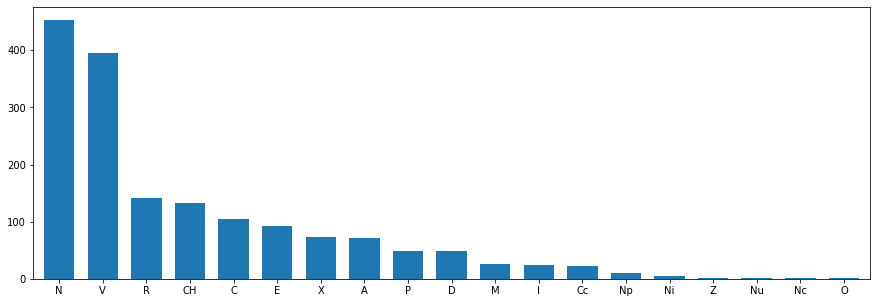

In [ ]:
go = open('/content/CS221-Project/dataset/gold.txt', encoding='utf-8').readlines()
plot_tag_counts(go)

## 5.1 Từ vựng

In [ ]:
vocabs = open('CS221-Project/resources/vocabs.txt', encoding='utf-8').read().split('\n')
vocabs_dict = {}
index = 0

for word in sorted(vocabs): 
    if word not in vocabs_dict: 
        vocabs_dict[word] = index  
        index += 1

In [ ]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 10: break

Số lượng từ vựng: 54818
: 0
!: 1
": 2
#: 3
$: 4
%: 5
&: 6
': 7
'': 8
'40s: 9
'60s: 10


## 5.2 Tập đữ liệu huấn luyện

In [ ]:
train_gold = open('CS221-Project/dataset/train_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập train_gold:', len(train_gold))


Số lượng từ trong tập train_gold: 1492


In [ ]:
train_words = preprocess(vocabs_dict, 'CS221-Project/dataset/train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))

Số lượng từ trong tập train_words: 1492


Các từ trong tập train không nằm trong từ điển: 
Để, Toeic, Nếu, Toeic, +, Bằng, Toeic, Toeic, Mình, Mini_Platform, TK25, SV, UIT, 000, /, khóa, Mình, KHTN, BKHCM, BKHN, ĐH, Công_Nghệ, Bất_kỳ, xóa, BHTCNPM, BQT, Ban, Nếu, Ban, Thầy, Khoa_học, Kỹ_thuật, Em, Toeic, /, cho_phép, chưa_thể, Em, Chào, khóa, K16, Giải_tích, Đại_số, Nhập_môn, Như, Cho, ĐGNL, Cho, ĐGNL, ĐGNL, Chuyện, 2021, xóa, Mình, Invision_Studio, file_setup, file_setup, Chào, gmail, mssv@gm.uit.edu.vn, Cho, ems, SV, KTX, Nhật, /, CNTT, KHMT, KTMT, KTPM, Mọi, Giới_thiệu, HTTT, /, Em, HK2, Cho, Cho, UIT, Nếu, OEP, Wifi, UIT_public, UIT, Thư_viện, wifi, Hôm_nay, C104, Mong, Dạ, SV, ko, Em, /, Em, thời_khóa_biểu, AV1, Email, gm.uit.edu.vn, Google, https://chungthuc.uit.edu.vn, Em, Em, Em, Doanh_nghiệp, …, Em, Khi, Sau, Em, PĐT, Cần, N     391
V     343
R     129
CH    104
C     102
E      79
X      68
A      51
P      47
D      40
M      26
I      24
Cc     21
Np     10
Z       2
Nu      1
Ni      1
Nc      1
O       1
Name: 0,

,N,V,R,CH,C,E,X,A,P,D,M,I,Cc,Np,Z,Nu,Ni,Nc,O,Total
0,391,343,129,104,102,79,68,51,47,40,26,24,21,10,2,1,1,1,1,1441


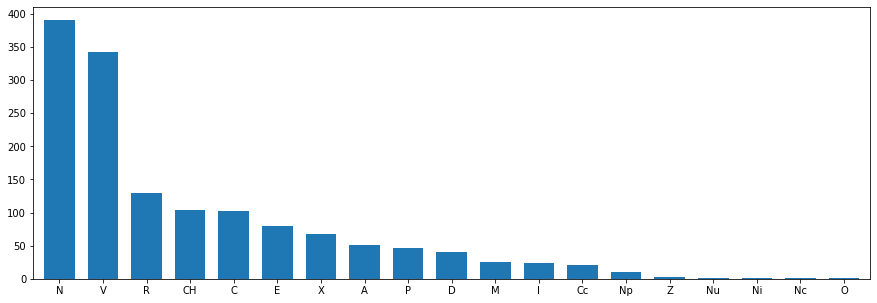

In [ ]:
print('Các từ trong tập train không nằm trong từ điển', end=': \n')
active = False
for word_tag, word in zip(train_gold, train_words):
    if word == '--unk--': 
      active = True
      print(word_tag.split()[0], end=', ')
if active == False: print("Không có")
plot_tag_counts(train_gold)

## 5.3 Tập dữ liệu kiểm tra


In [ ]:
test_gold = open('CS221-Project/dataset/test_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test_gold:', len(test_gold))
test_gold[0:5]

Số lượng từ trong tập test_gold: 221


['ĐTĐH\tX\n', 'linh_động\tA\n', 'hơn\tA\n', 'tạo\tV\n', 'điều_kiện\tN\n']

In [ ]:
test_words = preprocess(vocabs_dict, 'CS221-Project/dataset/test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 221


['--unk--', 'linh_động', 'hơn', 'tạo', 'điều_kiện']

Các từ không nằm trong vocabs: ĐTĐH, Đề_nghị, CTTT, HK, ko, HK, Nên, Khoa, Cải_thiện, C113, Giảng_đường, bàn_ghế, Giảng_đường, Nhà_vệ_sinh, căn_tin,  
N     61
V     53
CH    28
A     20
E     13
R     12
D      9
X      5
Ni     4
C      3
Cc     2
P      2
Name: 0, dtype: int64


,N,V,CH,A,E,R,D,X,Ni,C,Cc,P,Total
0,61,53,28,20,13,12,9,5,4,3,2,2,212


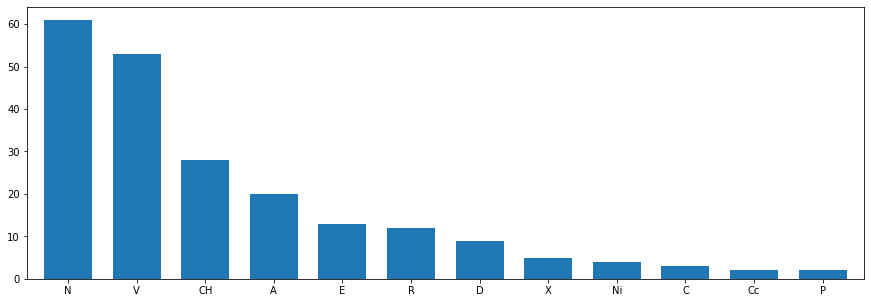

In [ ]:
print('Các từ không nằm trong vocabs', end=': ')
for word_tag, word in zip(test_gold, test_words):
    if word == '--unk--': 
      active = True
      print(word_tag.split()[0], end=', ')
if active == False: print("Không có")
print(" ")
plot_tag_counts(test_gold)

# 6. Gán nhãn từ loại



## 6.1 Huấn luyện dữ liệu
**Bước 1:** Đọc dữ liệu từ tập train_gold.txt và từ điển vocabs.txt

**Bước 2:** Kiểm tra và tách nhãn từng từ trong tập train, nếu từ nào không có trong từ điển thì gán biến *--unk--*

* Bước 2.1: Với mỗi từ xét các từ kề trước nó
* Bước 2.2: Đếm số lần xuất hiện của (từ,nhãn của từ)
* Bước 2.3: Đếm số lần xuất hiện một nhãn

Kết quả sau **bước 2** cho ta thông tin các nhãn, tập luật và các nghĩa của từ trên tập dữ liệu huấn luyện *(vì mỗi từ có thể có nhiều nghĩa tuỳ ngữ cảnh)*





In [ ]:
'''
Hàm này dùng để chia các từ thành word và tag với:
Input:  word_tag: các từ đã được gán nhãn trong được lưu trong file train_gold.txt
        vocabs_dict: các từ có trong từ điển vocabs.txt
Output: Từ và nhãn của từ. 
Lưu ý: Một câu mới bắt đầu từ word = '--n--' & tag = '--s--', nếu từ không có trong từ điển thì sẽ trả về --unk--
'''
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: word = '--unk--'
    return word, tag

In [ ]:
'''
Input: 
Output: 
'''
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

In [ ]:
transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, train_words)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

Số nhãn: 20
['--s--', 'A', 'C', 'CH', 'Cc', 'D', 'E', 'I', 'M', 'N', 'Nc', 'Ni', 'Np', 'Nu', 'O', 'P', 'R', 'V', 'X', 'Z']


In [ ]:
print("Transition examples: ")
for example in list(transition_counts.items())[5:10]:
    print(example)

Transition examples: 
(('N', 'C'), 30)
(('C', 'N'), 39)
(('V', 'V'), 72)
(('N', 'Np'), 7)
(('Np', 'E'), 2)


In [ ]:
print("Emission examples: ")
for example in list(emission_counts.items())[:7]:
    print(example)

Emission examples: 
(('C', '--unk--'), 5)
(('A', 'đủ'), 2)
(('N', 'điều_kiện'), 2)
(('V', 'ra'), 7)
(('N', 'trường'), 26)
(('C', 'thì'), 20)
(('N', 'em'), 43)


## 6.2 Kiểm tra dữ liệu

In [ ]:
'''
Input
'''
def predict_pos(words, gold, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())
    
    for word, gold_tuple in zip(words, gold): 
        gold_tuple_list = gold_tuple.split()
        if len(gold_tuple_list) != 2: continue # Loại các khoảng trắng
        else: true_label = gold_tuple_list[1]
    
        count_final = 0
        pos_final = ''
        if word not in vocabs_dict: continue
        
        for pos in states:
            if (pos, word) not in emission_counts: continue
            count = emission_counts[(pos, word)]
            
            if count > count_final:
                count_final = count
                pos_final = pos
                    
        if pos_final == true_label: num_correct += 1
    accuracy = num_correct / len(gold)
    return accuracy

In [ ]:
accuracy = predict_pos(train_words, train_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập train:', accuracy)

Độ chính xác trên tập train: 0.886058981233244


In [ ]:
accuracy = predict_pos(test_words, test_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập test:', accuracy)

Độ chính xác trên tập test: 0.6153846153846154


# 7. Ma trận xác suất Hidden Markov

## 7.1 Ma trận chuyển tiếp 'A' (trainsition matrix)

In [ ]:
tag_counts[sorted(tag_counts.keys())[5]]
tag_counts

defaultdict(int,
            {'C': 102,
             'A': 51,
             'N': 391,
             'V': 343,
             'Np': 10,
             'E': 79,
             'P': 47,
             'I': 24,
             'CH': 104,
             '--s--': 51,
             'M': 26,
             'R': 129,
             'Cc': 21,
             'D': 40,
             'X': 68,
             'Nu': 1,
             'Z': 2,
             'Ni': 1,
             'Nc': 1,
             'O': 1})

In [ ]:
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)
    
    # Khởi tạo một ma trận thống kê tần số
    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())
    
    for i in range(num_tags):
        for j in range(num_tags):
            count = 0 
            key = (all_tags[i], all_tags[j])
            if key in transition_counts: count = transition_counts[key]
                
            count_prev_tag = tag_counts[all_tags[i]]
            # Cập nhật giá trị của ma trận tần số = (Tần số của từng cặp nhãn + hệ số alpha)/ (Tần số của nhãn thứ i + alpha * tổng số nhãn)
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A

In [ ]:
alpha = 0.5
for i in range(len(states)): tag_counts.pop(i, None)
    
A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(A,index = states, columns = states)
df.head(5)
# print(A.shape)

,--s--,A,C,CH,Cc,D,E,I,M,N,Nc,Ni,Np,Nu,O,P,R,V,X,Z
--s--,0.008197,0.024590,0.122951,0.008197,0.008197,0.040984,0.057377,0.008197,0.008197,0.352459,0.008197,0.008197,0.008197,0.008197,0.024590,0.057377,0.008197,0.155738,0.073770,0.008197
A,0.008197,0.040984,0.057377,0.188525,0.040984,0.008197,0.155738,0.024590,0.008197,0.139344,0.008197,0.008197,0.008197,0.008197,0.008197,0.024590,0.139344,0.090164,0.024590,0.008197
C,0.004464,0.013393,0.031250,0.013393,0.004464,0.066964,0.022321,0.004464,0.013393,0.352679,0.004464,0.004464,0.004464,0.004464,0.004464,0.013393,0.093750,0.272321,0.066964,0.004464
CH,0.451754,0.013158,0.083333,0.013158,0.013158,0.013158,0.013158,0.004386,0.048246,0.118421,0.004386,0.004386,0.004386,0.013158,0.004386,0.030702,0.030702,0.074561,0.057018,0.004386
Cc,0.016129,0.016129,0.048387,0.016129,0.016129,0.048387,0.048387,0.016129,0.048387,0.209677,0.016129,0.016129,0.016129,0.016129,0.016129,0.016129,0.080645,0.274194,0.048387,0.016129


## 7.2 Ma trận phát xạ 'B' (emission matrix)

In [ ]:
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)
    
    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))
    
    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys(): count = emission_counts[key]
                
            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

In [ ]:
cidx  = ['em', 'và', 'cho', 'là', 'nhà_vệ_sinh','ngủ']
rvals = ['R', 'V', 'N', 'A', 'D','E','C','Cc','CH']
# Lấy ra vị trí của các từ
cols = [vocabs_dict[word] for word in cidx]
# Lấy tra vị trí của các nhãn
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)): tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df

,em,và,cho,là,nhà_vệ_sinh,ngủ
R,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
V,0.000018,0.000018,0.000306,0.000090,0.000018,0.000018
N,0.001565,0.000018,0.000018,0.000018,0.000018,0.000018
A,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
D,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
E,0.000018,0.000018,0.000418,0.000018,0.000018,0.000018
C,0.000018,0.000018,0.000018,0.000345,0.000018,0.000018
Cc,0.000018,0.000674,0.000018,0.000018,0.000018,0.000018
CH,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018


# 8. Thuật toán Viterbi
Do 2 ma trận A, B đều sẽ tính toán xác suất cho nhãn --s-- (nhãn bắt đầu) bình thường như các nhãn khác nên lúc dự đoán nhãn --s-- cũng có thể sẽ được gán cho bất kỳ từ nào. Nếu muốn nhãn --s-- không được gán khi dự đoán thì:
- Bỏ qua cột đầu khi sử dụng ma trận A => Khi sử dụng lại ma trận A trong thuật toán Viterbi phải trừ đi 1 ở cột
- Bỏ qua hàng đầu khi sử dụng ma trận B => Khi sử dụng lại ma trận B trong thuật toán Viterbi phải trừ đi 1 ở hàng


In [ ]:
import pandas as pd
A_viterbi = np.array([sublist[1:].tolist() for sublist in A])
B_viterbi = B[1:]
print("A_viterbi shape: ",A_viterbi.shape)
print("B_viterbi shape: ",B_viterbi.shape)


A_viterbi shape:  (20, 19)
B_viterbi shape:  (19, 54818)


## 8.1 Bước Initialization


In [ ]:
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--')
    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0: best_probs[i, 0] = float('-inf')
        else: 
            index = vocabs_dict[corpus[0]]
            # best_probs[i, 0] = math.log(A[s_idx, i]) + math.log(B[i, index])
            best_probs[i, 0] = math.log(A[s_idx, i - 1]) + math.log(B[i - 1, index])
    print(best_paths.size)
    return best_probs, best_paths

In [ ]:
best_probs_train, best_paths_train = viterbi_initialize(states, tag_counts, A_viterbi, B_viterbi, train_words, vocabs_dict)
print('best_probs_train[0, 0]:', best_probs_train[0, 0]) 
print('best_paths_train[2, 3]:', best_paths_train[2, 3])

29840
best_probs_train[0, 0]: -15.715867896959931
best_paths_train[2, 3]: 0


In [ ]:
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A_viterbi, B_viterbi, test_words, vocabs_dict)
print('best_probs_test[0, 0]:', best_probs_test[0, 0]) 
print('best_paths_test[2, 3]:', best_paths_test[2, 3])

4420
best_probs_test[0, 0]: -15.715867896959931
best_paths_test[2, 3]: 0


## 8.2 Bước Forward

In [ ]:
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]
    
    for i in range(1, len(corpus)): 
        if i % 5000 == 0: print(f'Processed {i} words...')
            
        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None
            
            for k in range(num_tags):
                index = vocabs_dict[corpus[i]]
                # prob = best_probs[k, i - 1] + math.log(A[k, j]) + math.log(B[j, index])
                prob = best_probs[k, i - 1] + math.log(A[k, j - 1]) + math.log(B[j - 1, index])

                if prob > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k
                    
            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i
    return best_probs, best_paths

In [ ]:
best_probs_train, best_paths_train = viterbi_forward(A_viterbi, B_viterbi, train_words, best_probs_train, best_paths_train, vocabs_dict)
print('best_probs_train[0, 1]:', best_probs_train[0, 1]) 
print('best_paths_train[0, 4]:', best_paths_train[0, 4])

best_probs_train[0, 1]: -25.016842958849708
best_paths_train[0, 4]: 17


In [ ]:
rows = [str(states.index(tag))+": "+tag for tag in states]
# df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)

df = pd.DataFrame([row[:10] for row in best_paths_train])

df.columns = train_words[:10]
df.index = rows
df
# print(best_paths_train.shape)
# count=1
# for row in best_paths_train:
#   print(row[:10].shape)
#   print(count)
#   count+=1

,--unk--,đủ,điều_kiện,ra,trường,thì,em,cần,đạt,bằng
0: --s--,0,18,1,9,17,9,2,9,17,17
1: A,0,9,1,9,17,9,2,9,17,17
2: C,0,9,17,9,17,9,2,9,17,17
3: CH,0,9,1,9,17,9,2,9,17,17
4: Cc,0,9,1,9,17,9,2,9,17,17
5: D,0,9,17,9,17,9,2,9,17,17
6: E,0,9,1,9,17,9,2,9,17,17
7: I,0,9,16,9,17,9,2,9,16,17
8: M,0,9,9,9,17,9,2,9,17,17
9: N,0,9,17,9,17,9,2,9,17,17


In [ ]:
best_probs_test, best_paths_test = viterbi_forward(A_viterbi, B_viterbi, test_words, best_probs_test, best_paths_test, vocabs_dict)
print('best_probs_test[0, 1]:', best_probs_test[0, 1]) 
print('best_paths_test[0, 4]:', best_paths_test[0, 4])

best_probs_test[0, 1]: -25.016842958849708
best_paths_test[0, 4]: 5


In [ ]:
rows = [str(states.index(tag))+": "+tag for tag in states]
# df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df = pd.DataFrame([row[:10] for row in best_paths_test])

df.columns = train_words[:10]
df.index = rows
df

,--unk--,đủ,điều_kiện,ra,trường,thì,em,cần,đạt,bằng
0: --s--,0,18,5,5,5,9,17,5,9,2
1: A,0,9,17,9,9,9,17,5,9,17
2: C,0,9,17,9,17,9,17,9,9,17
3: CH,0,9,17,1,9,9,17,9,9,17
4: Cc,0,9,8,9,9,9,17,5,9,8
5: D,0,9,17,17,17,9,17,5,9,2
6: E,0,9,17,9,17,9,17,9,9,17
7: I,0,9,16,16,16,9,16,5,9,16
8: M,0,9,9,9,9,9,17,5,9,9
9: N,0,9,17,17,17,9,17,5,9,17


## 8.3 Bước Backward


In [ ]:
def viterbi_backward(best_probs, best_paths, states):
    m = best_paths.shape[1] 
    z = [None] * m
    pred = [None] * m
    
    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]
    
    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k
            
    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [ ]:
train_pred = viterbi_backward(best_probs_train, best_paths_train, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, states)
m = len(test_pred)

print(f'Dự đoán cho test_pred[-7:{m - 1}]:')
print(test_words[-7:m-1])
print(test_pred[-7:m-1])

print('Dự đoán cho test_pred[0:7]:')
print(test_words[0:7])
print(test_pred[0:7])

Dự đoán cho test_pred[-7:220]:
['tóc_tai', 'sau', 'khi', 'đi', 'vệ_sinh', '?']
['C', 'N', 'N', 'V', 'N', 'CH']
Dự đoán cho test_pred[0:7]:
['--unk--', 'linh_động', 'hơn', 'tạo', 'điều_kiện', 'giúp', 'các']
['N', 'V', 'N', 'V', 'N', 'V', 'D']


In [ ]:
df = pd.DataFrame(np.reshape(train_pred,(1,len(train_pred))))
df.columns = train_words
df

,--unk--,đủ,điều_kiện,ra,trường,thì,em,cần,đạt,bằng,...,sập,"""",mỗi,khi,đăng_kí,học_phần,các,kỳ,.,--n--
0,N,V,N,V,N,C,N,V,V,N,...,V,N,V,N,V,N,D,N,CH,--s--


# 9. Đánh giả kết quả

In [ ]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--': print()
    else: print(f'{word}/{tag}', end=' ')

--unk--/N linh_động/V hơn/N tạo/V điều_kiện/N giúp/V các/D sinh_viên/N lỡ/V chậm/N tiến_độ/V sớm/N theo/V kịp/V chương_trình/N đào_tạo/V ./CH 
--unk--/V nhà_trường/N thiết_kế/V thời_gian/N học/V hợp_lí/N cho/V sinh_viên/N --unk--/X ,/CH cụ_thể/N tăng/V thời_gian/N học/V hè/N lên/V để/C đảm_bảo/V chất_lượng/N dạy/V và/N học/V ./CH 
Trường/N cố_gắng/V sắp_xếp/N mở/V các/D lớp_học/N lại/R cho/V chương_trình/N chất_lượng/N cao/A ,/CH trường_hợp/C những/D bạn/N rớt/V nhiều/N muốn/V học/V lại/R trong/E --unk--/N hè/V nhưng/C --unk--/N có/V lớp/N mở/V để/C học/V ,/CH phải/V học/V trong/E --unk--/N chính/V ./CH 
--unk--/N tổ_chức/V học/V các/D học_phần/N bắt_buộc/R theo/V các/D lớp/N cùng/V --unk--/N (/V không/R phải/V đăng_ký/V )/N ,/CH chỉ/R nên/V đăng_ký/V những/D môn/N tự/R chọn/I ,/CH môn/N chuyên_ngành/N ./CH 
--unk--/N lại/R nhà_vệ_sinh/V của/E khu/N C/R (/V phía/N gần/V phòng/N --unk--/V )/N ,/CH nhà_vệ_sinh/N khối/V nhà/N C/R cũ/I ,/CH xuống_cấp/M ./CH 
Việc/N giữ/V vệ_sinh/N tại/E cá

In [ ]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2: continue 

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)
        
    print(classification_report(y_pred, y_true))
    return y_pred, y_true

In [ ]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:\n')
y_pred, y_true_train = report(train_pred, train_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập train:

              precision    recall  f1-score   support

           A       0.37      1.00      0.54        19
           C       0.80      0.87      0.84        94
          CH       0.89      0.98      0.93        95
          Cc       0.76      1.00      0.86        16
           D       0.90      1.00      0.95        36
           E       0.68      0.93      0.79        58
           I       1.00      0.92      0.96        26
           M       0.42      1.00      0.59        11
           N       0.95      0.79      0.87       470
          Nc       0.00      0.00      0.00         0
          Ni       0.00      0.00      0.00         0
          Np       0.00      0.00      0.00         0
          Nu       0.00      0.00      0.00         0
           O       0.00      0.00      0.00         0
           P       0.62      1.00      0.76        29
           R       0.83      0.87      0.85       123
   

In [ ]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:

              precision    recall  f1-score   support

           A       0.10      1.00      0.18         2
           C       0.67      0.25      0.36         8
          CH       0.75      1.00      0.86        21
          Cc       0.50      1.00      0.67         1
           D       1.00      1.00      1.00         9
           E       0.62      1.00      0.76         8
           I       0.00      0.00      0.00         4
           M       0.00      0.00      0.00         2
           N       0.75      0.65      0.70        71
          Ni       0.00      0.00      0.00         0
           P       0.50      1.00      0.67         1
           R       0.92      0.73      0.81        15
           V       0.81      0.63      0.71        68
           X       0.20      0.50      0.29         2

    accuracy                           0.68       212
   macro avg       0.49      0.63      0.50       212
wei

In [ ]:
# y_true_test


In [ ]:
y_pred = []
for word_tag in test_gold:
    word_tag_tuple = word_tag.split()
    if len(word_tag_tuple) != 2: 
        print()
        continue

    word, tag = word_tag_tuple
    if '_' not in word: pred = vncore_postag(word)
    else: pred = vncore_postag(word.replace('_', ' '))

    print(f'{word}/{pred}', end=' ') 
    y_pred.append(pred)

ĐTĐH/Np linh_động/V hơn/A tạo/V điều_kiện/N giúp/V các/L sinh_viên/N lỡ/V chậm/A tiến_độ/N sớm/A theo/V kịp/A chương_trình/N đào_tạo/V ./CH 
Đề_nghị/V nhà_trường/N thiết_kế/V thời_gian/N học/V hợp_lí/A cho/E sinh_viên/N CTTT/Np ,/CH cụ_thể/A tăng/V thời_gian/N học/V hè/N lên/V để/E đảm_bảo/V chất_lượng/N dạy/V và/Cc học/V ./CH 
Trường/Np cố_gắng/V sắp_xếp/V mở/V các/L lớp_học/N lại/R cho/E chương_trình/N chất_lượng/N cao/A ,/CH trường_hợp/N những/L bạn/N rớt/V nhiều/A muốn/V học/V lại/R trong/E HK/Np hè/N nhưng/C ko/V có/V lớp/N mở/V để/E học/V ,/CH phải/V học/V trong/E HK/Np chính/T ./CH 
Nên/V tổ_chức/V học/V các/L học_phần/N bắt_buộc/V theo/V các/L lớp/N cùng/A Khoa/Np (/CH không/R phải/V đăng_ký/V )/CH ,/CH chỉ/R nên/C đăng_ký/V những/L môn/N tự/P chọn/V ,/CH môn/N chuyên_ngành/N ./CH 
Cải_thiện/V lại/R nhà_vệ_sinh/N của/E khu/N C/Ni (/CH phía/N gần/A phòng/N C113/M )/CH ,/CH nhà_vệ_sinh/N khối/N nhà/N C/Ni cũ/A ,/CH xuống_cấp/V ./CH 
Việc/N giữ/V vệ_sinh/V tại/E các/L phòng/N này/

In [ ]:
print('Kết quả khi sử dụng thư viện VnCoreNLP trên tập test:\n')
print(classification_report(y_pred, y_true_test))

Kết quả khi sử dụng thư viện VnCoreNLP trên tập test:

              precision    recall  f1-score   support

           A       0.90      1.00      0.95        18
           C       1.00      1.00      1.00         3
          CH       1.00      1.00      1.00        28
          Cc       1.00      1.00      1.00         2
           D       0.00      0.00      0.00         0
           E       1.00      1.00      1.00        13
           L       0.00      0.00      0.00         9
           M       0.00      0.00      0.00         1
           N       0.87      1.00      0.93        53
          Ni       1.00      1.00      1.00         4
          Np       0.00      0.00      0.00         9
           P       1.00      1.00      1.00         2
           R       1.00      1.00      1.00        12
           T       0.00      0.00      0.00         1
           V       1.00      0.93      0.96        57
           X       0.00      0.00      0.00         0

    accuracy             

In [ ]:
from underthesea import pos_tag
y_pred = []
for word_tag in test_gold:
    word_tag_tuple = word_tag.split()
    if len(word_tag_tuple) != 2: 
        print()
        continue

    word, tag = word_tag_tuple
    if '_' not in word: pred = pos_tag(word)[0][1]
    else: pred = pos_tag(word.replace('_', ' '))[0][1]
    print(f'{word}/{pred}', end=' ') 
    y_pred.append(pred)

ĐTĐH/Np linh_động/M hơn/A tạo/V điều_kiện/N giúp/V các/L sinh_viên/N lỡ/M chậm/A tiến_độ/N sớm/A theo/V kịp/A chương_trình/N đào_tạo/V ./CH 
Đề_nghị/V nhà_trường/N thiết_kế/V thời_gian/N học/V hợp_lí/M cho/E sinh_viên/N CTTT/Np ,/CH cụ_thể/A tăng/V thời_gian/N học/V hè/N lên/V để/E đảm_bảo/V chất_lượng/N dạy/V và/C học/V ./CH 
Trường/N cố_gắng/V sắp_xếp/M mở/V các/L lớp_học/N lại/R cho/E chương_trình/N chất_lượng/N cao/A ,/CH trường_hợp/N những/L bạn/N rớt/V nhiều/A muốn/V học/V lại/R trong/E HK/Np hè/N nhưng/C ko/M có/V lớp/N mở/V để/E học/V ,/CH phải/V học/V trong/E HK/Np chính/T ./CH 
Nên/C tổ_chức/V học/V các/L học_phần/M bắt_buộc/V theo/V các/L lớp/N cùng/A Khoa/Np (/CH không/R phải/V đăng_ký/V )/CH ,/CH chỉ/R nên/C đăng_ký/V những/L môn/N tự/P chọn/V ,/CH môn/N chuyên_ngành/A ./CH 
Cải_thiện/M lại/R nhà_vệ_sinh/N của/E khu/N C/M (/CH phía/N gần/A phòng/N C113/Np )/CH ,/CH nhà_vệ_sinh/N khối/M nhà/N C/M cũ/A ,/CH xuống_cấp/V ./CH 
Việc/N giữ/V vệ_sinh/M tại/E các/L phòng/N này/P c

In [ ]:
print('Kết quả khi sử dụng thư viện Underthesea trên tập test:\n')
print(classification_report(y_pred, y_true_test))

Kết quả khi sử dụng thư viện Underthesea trên tập test:

              precision    recall  f1-score   support

           A       0.75      0.94      0.83        16
           C       1.00      0.50      0.67         6
          CH       1.00      1.00      1.00        28
          Cc       0.00      0.00      0.00         0
           D       0.00      0.00      0.00         0
           E       1.00      1.00      1.00        13
           L       0.00      0.00      0.00         9
           M       0.00      0.00      0.00        27
           N       0.75      1.00      0.86        46
          Nc       0.00      0.00      0.00         1
          Ni       0.00      0.00      0.00         0
          Np       0.00      0.00      0.00         6
           P       1.00      1.00      1.00         2
           R       1.00      0.92      0.96        13
           T       0.00      0.00      0.00         1
           V       0.81      0.98      0.89        44
           X       0.00 